# About Facebook Prophet


Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

Prophet is open source software released by Facebook’s Core Data Science team. It is available for download on CRAN and PyPI.


**2. Advantages of Prophet **


Prophet has several advantages associated with it. These are given below:-

1. Accurate and fast - Prophet is accurate and fast. It is used in many applications across Facebook for producing reliable forecasts for planning and goal setting.
2. Fully automatic - Prophet is fully automatic. We will get a reasonable forecast on messy data with no manual effort.
3. Tunable forecasts - Prophet produces adjustable forecasts. It includes many possibilities for users to tweak and adjust forecasts. We can use human-interpretable parameters to improve the forecast by adding our domain knowledge.
4. Available in R or Python - We can implement the Prophet procedure in R or Python.
5. Handles seasonal variations well - Prophet accommodates seasonality with multiple periods.
6. Robust to outliers - It is robust to outliers. It handles outliers by removing them.
7. Robust to missing data - Prophet is resilient to missing data.
3. Installation of Prophet
Table of Contents

We can install Prophet using either command prompt or Anaconda prompt using pip as follows-


In [ ]:
!pip install prophet

# Getting stock data from Yahoo into FB Prophet



Let's plot historical stock prices for S& P 500. Ticker symbol is '^GSPC'

To view
[Ticker Symbls list](https://stockanalysis.com/stocks/)

[*********************100%%**********************]  1 of 1 completed


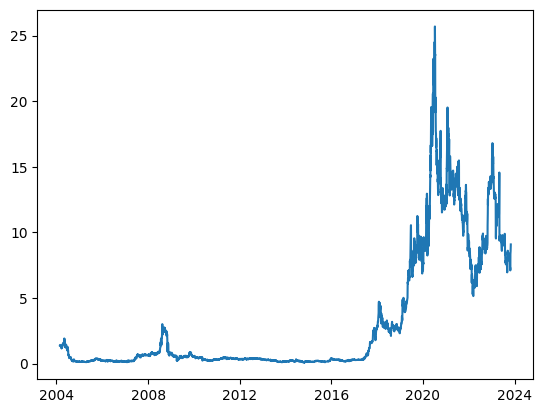

In [ ]:

# Python
import pandas as pd
from prophet import Prophet

from pandas_datareader import data as web
import datetime

import pandas as pd
import matplotlib.pyplot as plt

!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

from datetime import timedelta

import matplotlib.pyplot as plt

#stock = 'spy'
#yesterday = pd.to_datetime("today")-1
#print(yesterday)
#endDate = pd.to_datetime("today")
#start_date = (datetime.datetime.now() - datetime.timedelta(days=2000)).strftime("%m-%d-%Y")
#start_date = (endDate - datetime.timedelta(days=2000)).strftime("%m-%d-%Y")
#print(start_date)
#df = web.DataReader(stock, data_source='yahoo', start=start_date,end=endDate)
#df = web.DataReader(stock, data_source='yahoo', start=start_date)
#date is the index so you need to make it a column
#df["Date"] = df.index

stock='ZYXI'




start = '1900-01-01'

today = pd.to_datetime("today")
yesterday = pd.to_datetime("today") - timedelta(days = 1)
end = yesterday

df = yf.download(stock,
start=start,
end=yesterday,
auto_adjust=True,
actions='inline',
progress=True)

df = df.loc[:, ['Close']]
#df_GSPC = df_GSPC.pct_change().dropna()

plt.plot(df['Close'])
# plt.savefig('/content/gdrive/My Drive/Colab Notebooks/SPY_time_series_forecasting/images/SPY.png')


In [ ]:
# Most recent stock prices
df.tail()


,Close
Date,
2023-10-27,8.34
2023-10-30,8.58
2023-10-31,8.88
2023-11-01,8.89
2023-11-02,9.08


In [ ]:
# Most historic Stock Prices
df.head()

,Close
Date,
2004-02-25,1.379478
2004-02-26,1.413721
2004-02-27,1.418613
2004-03-01,1.413721
2004-03-02,1.394154


In [ ]:
#date is the index so you need to make it a column
df["Date"] = df.index
df = df.rename(columns={"Date": "ds", "Close": "y"}, errors="raise")


# Make Stock Predictions

In [ ]:
m = Prophet()
m.fit(df)
# Python
future = m.make_future_dataframe(periods=151)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp21p41wnv/lkn6cly3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp21p41wnv/48tgt4vm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47259', 'data', 'file=/tmp/tmp21p41wnv/lkn6cly3.json', 'init=/tmp/tmp21p41wnv/48tgt4vm.json', 'output', 'file=/tmp/tmp21p41wnv/prophet_modelj7k4rdq1/prophet_model-20231103175444.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:54:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:54:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
5104,2024-03-28,8.925341,6.796735,10.987344
5105,2024-03-29,8.926393,7.124886,10.935936
5106,2024-03-30,9.272482,7.264329,11.376558
5107,2024-03-31,9.283454,7.236356,11.185830
5108,2024-04-01,8.978682,6.942529,10.923471


In [ ]:
#The initial predictions
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2004-02-25,0.862342,-1.059568,2.710441
1,2004-02-26,0.837662,-1.156833,2.971657
2,2004-02-27,0.818849,-1.187943,2.804145
3,2004-03-01,0.795072,-1.135560,2.731268
4,2004-03-02,0.779506,-1.128806,2.732180


In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)
#use "all" tab. Variations in 1 week, 1 month etc is infinitesimally small


In [ ]:
plot_components_plotly(m, forecast)


In [ ]:
future_predictions = forecast[forecast['ds'] > '2024-04-01']
future_predictions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat


In [ ]:
initial_predictions = forecast[(forecast['ds'] >= '2023-01-01') & (forecast['ds'] <= '2023-12-31')]
initial_predictions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
4747,2023-01-03,10.352670,8.058277,11.916803,10.352670,10.352670,-0.315446,-0.315446,-0.315446,-0.084484,-0.084484,-0.084484,-0.230962,-0.230962,-0.230962,0.0,0.0,0.0,10.037224
4748,2023-01-04,10.350410,8.082770,12.122916,10.350410,10.350410,-0.294313,-0.294313,-0.294313,-0.082453,-0.082453,-0.082453,-0.211861,-0.211861,-0.211861,0.0,0.0,0.0,10.056097
4749,2023-01-05,10.348151,8.052285,11.864117,10.348151,10.348151,-0.289538,-0.289538,-0.289538,-0.098364,-0.098364,-0.098364,-0.191174,-0.191174,-0.191174,0.0,0.0,0.0,10.058613
4750,2023-01-06,10.345892,8.126409,12.116517,10.345892,10.345892,-0.275654,-0.275654,-0.275654,-0.106516,-0.106516,-0.106516,-0.169137,-0.169137,-0.169137,0.0,0.0,0.0,10.070238
4751,2023-01-09,10.339115,8.177026,12.262922,10.339115,10.339115,-0.184616,-0.184616,-0.184616,-0.086939,-0.086939,-0.086939,-0.097677,-0.097677,-0.097677,0.0,0.0,0.0,10.154499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5012,2023-12-27,9.543907,7.114095,11.024614,9.543907,9.543907,-0.391448,-0.391448,-0.391448,-0.082453,-0.082453,-0.082453,-0.308995,-0.308995,-0.308995,0.0,0.0,0.0,9.152459
5013,2023-12-28,9.541648,7.162128,10.958083,9.541648,9.541648,-0.403380,-0.403380,-0.403380,-0.098364,-0.098364,-0.098364,-0.305016,-0.305016,-0.305016,0.0,0.0,0.0,9.138268
5014,2023-12-29,9.539389,7.290456,11.065654,9.539389,9.539389,-0.405379,-0.405379,-0.405379,-0.106516,-0.106516,-0.106516,-0.298863,-0.298863,-0.298863,0.0,0.0,0.0,9.134010
5015,2023-12-30,9.537130,7.557547,11.267981,9.537130,9.537130,-0.061120,-0.061120,-0.061120,0.229378,0.229378,0.229378,-0.290498,-0.290498,-0.290498,0.0,0.0,0.0,9.476010


#Interview Readiness Questions
1. Choose a new Ticker Symbol

**Zynex, Inc.**

develops advanced electrotherapy technology to manage chronic pain and assist in patient recovery. They are a global leader in manufacturing electrotherapy devices and aim to combat the opioid epidemic with safe alternatives. Deloitte's 2020 Technology Fast 500 ranked them 13th among medical device companies in the U.S. and Canada for their revenue growth.


2. What were the future price predictions

The initial price predictions indicate a potential price increase or an upward trend during that period. The 'yhat' value approximately increases 8 to 9 units until the end of March 2024.

3. What were the initial price predictions

The initial price predictions are relatively stable with minor fluctuations.
The 'yhat' values for the initial dates in 2004 are relatively low (e.g., around 0.86 units), indicating an initial period of low prices.



# References
1, https://www.kaggle.com/code/prashant111/tutorial-time-series-forecasting-with-prophet

2. https://colab.research.google.com/drive/1bb9LykqXq3FV8snTlWrPTHzB3amP9YFH?usp=sharing#scrollTo=iXzl-4Fz-hPV
